ML LAB - 2

A1.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np

# 1. Load the Excel file and select the "Purchase data" worksheet
file_path = "Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

# 2. Split into A (products purchased) and C (payment)
# We will exclude the 'Customer' column and use only the product quantities
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values  # Matrix A
C = df[['Payment (Rs)']].values  # Matrix C (target values)

# 3. Dimensionality of vector space
# Dimensionality is basically the number of features (columns in A)
dimensionality = A.shape[1]
print("\nDimensionality of the vector space:", dimensionality)

# 4. Number of vectors in the space
# Number of rows = number of vectors (observations)
num_vectors = A.shape[0]
print("Number of vectors in the vector space:", num_vectors)

# 5. Rank of Matrix A
rank_A = np.linalg.matrix_rank(A)
print("Rank of Matrix A:", rank_A)

# 6. Solving AX = C using pseudo-inverse
# Formula: X = (A^+)C
A_pinv = np.linalg.pinv(A)
X = A_pinv.dot(C)

# Display product costs
product_names = ['Candy Cost (Rs)', 'Mango Cost (Rs/kg)', 'Milk Packet Cost (Rs)']
print("\nEstimated Cost of Each Product:")
for name, cost in zip(product_names, X):
    print(f"{name}: ₹{round(float(cost[0]), 2)}")


Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3

Estimated Cost of Each Product:
Candy Cost (Rs): ₹1.0
Mango Cost (Rs/kg): ₹55.0
Milk Packet Cost (Rs): ₹18.0


A2.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

# Drop any completely empty columns
df = df.dropna(axis=1, how='all')

# Create the label: 1 = RICH (Payment > 200), 0 = POOR
df['label'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0)

# Features and target
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model on all data
model = LogisticRegression()
model.fit(X_scaled, y)

# Predict for all customers
y_pred = model.predict(X_scaled)

# Print results for all customers
print("Customer Classification Results:")
for name, label in zip(df['Customer'], y_pred):
    status = "RICH" if label == 1 else "POOR"
    print(f"{name} → {status}")

Customer Classification Results:
C_1 → RICH
C_2 → RICH
C_3 → RICH
C_4 → POOR
C_5 → RICH
C_6 → POOR
C_7 → RICH
C_8 → RICH
C_9 → POOR
C_10 → POOR


A3.

Initial Data:
           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  

Population Mean (Price): 1560.66
Population Variance (Price): 58732.37

Sample Mean (Wednesday): 1550.71
Observation:  Lower than population mean

Sample Mean (April): 1698.95
Observation:  Higher than population mean

Probability of Loss: 0.50

Probability of Profit on Wednesday: 0.42


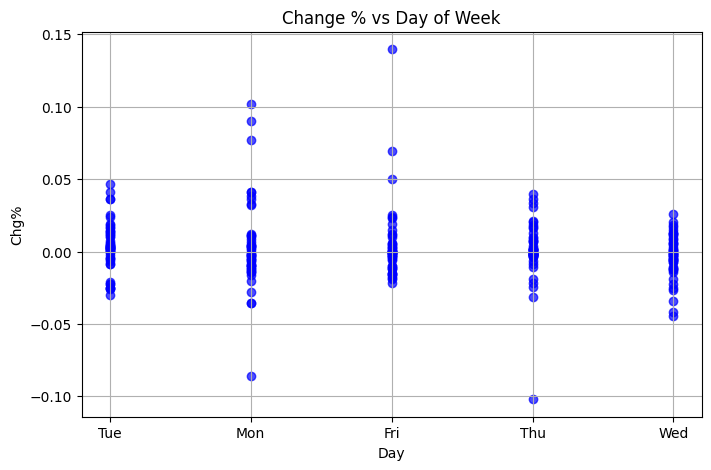

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load the Excel sheet
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

# Display first few rows to verify
print("Initial Data:")
print(df.head())

# 1. Mean and Variance of Price
price_list = df['Price'].dropna().tolist()
mean_price = statistics.mean(price_list)
var_price = statistics.variance(price_list)

print(f"\nPopulation Mean (Price): {mean_price:.2f}")
print(f"Population Variance (Price): {var_price:.2f}")

# 2. Sample Mean for Wednesdays
wed_data = df[df['Day'] == 'Wed']
wed_mean = statistics.mean(wed_data['Price'])

print(f"\nSample Mean (Wednesday): {wed_mean:.2f}")
print("Observation: ", "Higher" if wed_mean > mean_price else "Lower", "than population mean")

# 3. Sample Mean for April
apr_data = df[df['Month'] == 'Apr']
apr_mean = statistics.mean(apr_data['Price'])

print(f"\nSample Mean (April): {apr_mean:.2f}")
print("Observation: ", "Higher" if apr_mean > mean_price else "Lower", "than population mean")

# 4. Probability of Making a Loss (Chg% < 0)
chg_loss = df['Chg%'].apply(lambda x: x < 0).sum()
total_days = len(df)
loss_prob = chg_loss / total_days

print(f"\nProbability of Loss: {loss_prob:.2f}")

# 5. Probability of Profit on Wednesday (Chg% > 0 and Day = Wed)
wed_profit = df[(df['Day'] == 'Wed') & (df['Chg%'] > 0)].shape[0]
wed_total = df[df['Day'] == 'Wed'].shape[0]
prob_profit_wed = wed_profit / wed_total if wed_total > 0 else 0

print(f"\nProbability of Profit on Wednesday: {prob_profit_wed:.2f}")

# 6. Conditional Probability of Profit given it's Wednesday
# This is same as above since we already calculated P(Profit | Wednesday)

# 7. Scatter Plot: Chg% vs Day
plt.figure(figsize=(8, 5))
plt.scatter(df['Day'], df['Chg%'], color='blue', alpha=0.7)
plt.title("Change % vs Day of Week")
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()

A4.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# --- 1. Attribute Datatypes ---
print("\n1. Attribute Data Types:")
for col in df.columns:
    dtype = df[col].dtype
    print(f"{col}: {dtype}")

# --- 2. Categorical Attributes & Encoding Strategy ---
print("\n2. Categorical Attributes and Encoding Strategy:")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encode_cols = ['Condition'] if 'Condition' in categorical_cols else []
onehot_encode_cols = [col for col in categorical_cols if col not in label_encode_cols]



# --- 3. Data Range for Numeric Variables ---
print("\n3. Data Range for Numeric Variables:")
numerical_cols = df.select_dtypes(include='number').columns.tolist()
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Range = {min_val} to {max_val}")

# --- 4. Missing Values ---
print("\n4. Missing Values Count:")
missing = df.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"{col}: {count} missing values")

# Fill missing values for further steps
df.fillna(method='ffill', inplace=True)

# --- 5. Outlier Detection using IQR ---
print("\n5. Outlier Detection:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers")

# --- 6. Mean and Variance ---
print("\n6. Mean and Variance:")
for col in numerical_cols:
    mean = df[col].mean()
    std_dev = df[col].std()
    print(f"{col}: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}")

# --- 7. Encoding Categorical Variables ---
print("\n7. Encoding Categorical Variables...")

# Label Encoding
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=onehot_encode_cols, drop_first=True)


1. Attribute Data Types:
Record ID: int64
age: int64
sex: object
on thyroxine: object
query on thyroxine: object
on antithyroid medication: object
sick: object
pregnant: object
thyroid surgery: object
I131 treatment: object
query hypothyroid: object
query hyperthyroid: object
lithium: object
goitre: object
tumor: object
hypopituitary: object
psych: object
TSH measured: object
TSH: object
T3 measured: object
T3: object
TT4 measured: object
TT4: object
T4U measured: object
T4U: object
FTI measured: object
FTI: object
TBG measured: object
TBG: object
referral source: object
Condition: object

2. Categorical Attributes and Encoding Strategy:

3. Data Range for Numeric Variables:
Record ID: Range = 840801013 to 870119035
age: Range = 1 to 65526

4. Missing Values Count:

5. Outlier Detection:
Record ID: 0 outliers
age: 4 outliers

6. Mean and Variance:
Record ID: Mean = 852947346.61, Std Dev = 7581968.78
age: Mean = 73.56, Std Dev = 1183.98

7. Encoding Categorical Variables...


/tmp/ipython-input-7-1898274872.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


A5.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Convert all 't'/'f', 'y'/'n' etc. to 1/0
df_binary = df.replace({'t': 1, 'f': 0, 'y': 1, 'n': 0})

# Select only binary columns (those with just two unique values: 0 and 1)
binary_cols = [col for col in df_binary.columns if df_binary[col].dropna().nunique() == 2 and
               set(df_binary[col].dropna().unique()).issubset({0, 1})]

# Extract first two observation vectors from binary columns
v1 = df_binary.loc[0, binary_cols].astype(int).values
v2 = df_binary.loc[1, binary_cols].astype(int).values

# Compute f11, f00, f10, f01
f11 = sum((v1 == 1) & (v2 == 1))
f00 = sum((v1 == 0) & (v2 == 0))
f10 = sum((v1 == 1) & (v2 == 0))
f01 = sum((v1 == 0) & (v2 == 1))

# Calculate Jaccard Coefficient and Simple Matching Coefficient
jaccard = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

# Print the results
print("Binary Attributes Considered:", binary_cols)
print(f"f11 = {f11}, f00 = {f00}, f10 = {f10}, f01 = {f01}")
print(f"\nJaccard Coefficient (JC): {jaccard:.4f}")
print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

Binary Attributes Considered: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
f11 = 1, f00 = 16, f10 = 1, f01 = 2

Jaccard Coefficient (JC): 0.2500
Simple Matching Coefficient (SMC): 0.8500


/tmp/ipython-input-8-3731227765.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binary = df.replace({'t': 1, 'f': 0, 'y': 1, 'n': 0})


A6.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Drop non-numeric columns for cosine similarity calculation
df_numeric = df.select_dtypes(include=[np.number])

# Drop rows with missing values to avoid NaNs during similarity
df_numeric_clean = df_numeric.dropna()

# Ensure we have at least two clean rows
if df_numeric_clean.shape[0] >= 2:
    vec1 = df_numeric_clean.iloc[0].values.reshape(1, -1)
    vec2 = df_numeric_clean.iloc[1].values.reshape(1, -1)

    # Calculate cosine similarity
    cos_sim = cosine_similarity(vec1, vec2)[0][0]

    print(f"\nCosine Similarity between first two observations (full numeric vectors): {cos_sim:.4f}")
else:
    print("Not enough valid numeric data to compute cosine similarity.")


Cosine Similarity between first two observations (full numeric vectors): 1.0000


A7.

/tmp/ipython-input-10-2592661487.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binary = df.replace({'t': 1, 'f': 0, 'y': 1, 'n': 0})


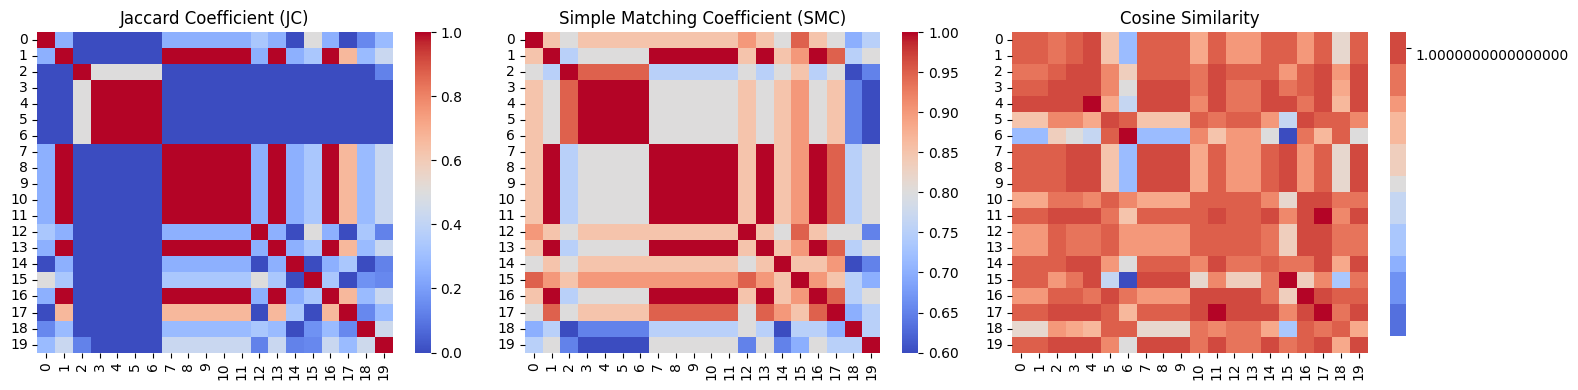

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Convert t/f/y/n to binary (1/0)
df_binary = df.replace({'t': 1, 'f': 0, 'y': 1, 'n': 0})

# Select only binary columns
binary_cols = df_binary.columns[df_binary.apply(lambda col: col.dropna().isin([0, 1]).all())]
binary_data = df_binary[binary_cols].head(20).dropna()

n = len(binary_data)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        a = binary_data.iloc[i].values
        b = binary_data.iloc[j].values

        f11 = np.sum((a == 1) & (b == 1))
        f00 = np.sum((a == 0) & (b == 0))
        f10 = np.sum((a == 1) & (b == 0))
        f01 = np.sum((a == 0) & (b == 1))

        jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
        smc = (f11 + f00) / (f11 + f00 + f10 + f01)

        jc_matrix[i, j] = jc
        smc_matrix[i, j] = smc

numeric_data = df.select_dtypes(include=[np.number]).head(20).dropna()
cos_matrix = cosine_similarity(numeric_data)

plt.figure(figsize=(16, 4))

# JC Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, cmap='coolwarm', annot=False)
plt.title("Jaccard Coefficient (JC)")

# SMC Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, cmap='coolwarm', annot=False)
plt.title("Simple Matching Coefficient (SMC)")

# COS Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, cmap='coolwarm', annot=False)
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()

A8.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

print("Missing Values BEFORE Imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Split into numeric and categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Step 1: Detect Outliers using IQR
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        outlier_cols.append(col)

# Step 2: Impute missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col in numeric_cols:
            if col in outlier_cols:
                df[col].fillna(df[col].median(), inplace=True)
                print(f"{col}: Imputed using MEDIAN")
            else:
                df[col].fillna(df[col].mean(), inplace=True)
                print(f"{col}: Imputed using MEAN")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"{col}: Imputed using MODE")

# Final check
print("\nMissing Values AFTER Imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing Values BEFORE Imputation:
Series([], dtype: int64)

Missing Values AFTER Imputation:
Series([], dtype: int64)


A9.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Detect outliers using IQR to decide scaling method
minmax_cols = []
standard_cols = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    if outliers.empty:
        minmax_cols.append(col)
    else:
        standard_cols.append(col)

# Apply Min-Max Scaling
if minmax_cols:
    minmax_scaler = MinMaxScaler()
    df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])
    print(f"Min-Max Scaling applied to: {minmax_cols}")

# Apply Standard Scaling
if standard_cols:
    standard_scaler = StandardScaler()
    df[standard_cols] = standard_scaler.fit_transform(df[standard_cols])
    print(f"Standard Scaling applied to: {standard_cols}")

# Display the normalized data (first 5 rows)
print("\nNormalized Data Snapshot:")
print(df[numeric_cols].head())

Min-Max Scaling applied to: ['Record ID']
Standard Scaling applied to: ['age']

Normalized Data Snapshot:
      Record ID       age
0  0.000000e+00 -0.037634
1  3.410871e-08 -0.037634
2  9.891527e-07 -0.027499
3  6.934301e-05 -0.031722
4  6.937712e-05 -0.035100
